In [ ]:
# tensorflow 라이브러리 설치
# !pip install tensorflow

In [ ]:
# 딥러닝 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [ ]:
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 학습용 데이터 형태 살펴보기
x_train.shape

(60000, 28, 28)

In [ ]:
# 학습용 첫 번째 데이터 살펴보기1
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# 학습용 첫 번째 데이터 살펴보기2
y_train[0]

5

In [ ]:
# 데이터 전처리(0 ~ 1 사이 숫자로)
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# 데이터 전처리 결과 확인
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # 확률 출력해준다
])

In [ ]:
# 모델 컴파일 : 최적화 함수, 손실 함수 설정 + 평가 지표 설정 + 가중치 초기화)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습 : 전체 데이터는 5번 반복
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2110 - accuracy: 0.9362
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0499 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0406 - accuracy: 0.9870


In [ ]:
# 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9768


[0.0890878215432167, 0.9768000245094299]

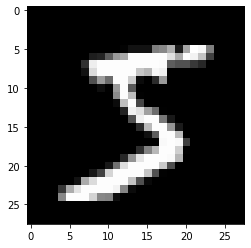

In [ ]:
# 예측 - 0번째 숫자 이미지로 보기
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
# 예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[0].reshape(1, 28, 28)))

[[1.9727622e-11 3.6183168e-09 1.0148086e-09 4.1803896e-02 2.6451419e-13
  9.5819604e-01 1.6622179e-11 6.5467964e-11 3.2957104e-08 6.2652954e-09]]


In [ ]:
# 예측 - 0번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[0].reshape(1, 28, 28))))

5
